In [47]:
import numpy as np
from numpy import load
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
# Load the X_train, Y_train, X_test and Y_test
X_train = np.load('../data/fnc-1/x_train.npy')
X_test = np.load('../data/fnc-1/x_test.npy')
Y_train = np.load('../data/fnc-1/y_train.npy', allow_pickle=True)
Y_test = load('../data/fnc-1/y_test.npy', allow_pickle=True)

In [3]:
# Converting the labels into int type to prevent unknown type error 
Y_test = Y_test.astype('int')
Y_train = Y_train.astype('int')

In [4]:
from imblearn.over_sampling import SMOTE


In [5]:
oversample = SMOTE()
XX, YY = oversample.fit_resample(X_train, Y_train)

In [11]:
from collections import Counter

In [13]:
Counter(YY)

Counter({3: 36545, 0: 36545, 2: 36545, 1: 36545})

### Logistic Regression Classifier

In [15]:
ll = LogisticRegression()

In [16]:
ll.fit(XX, YY)

/Users/neeraj/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [17]:
ll.score(X_test, Y_test)

0.8432298429937434

In [21]:
lr_Y_predictions = ll.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, lr_Y_predictions) * 100, "%")
# Getting the confusion matrix
print('Confusion Matrix:\n', confusion_matrix(Y_test, lr_Y_predictions))
# Precision score
print('Precision Score: ', precision_score(Y_test, lr_Y_predictions, average="micro"))
# Recall score
print('Recall Score: ', recall_score(Y_test, lr_Y_predictions, average="micro"))
print(classification_report(Y_test, lr_Y_predictions))

Accuracy:  84.32298429937434 %
Confusion Matrix:
 [[  956    40   695   212]
 [  236    30   247   184]
 [  852   110  2784   718]
 [  213    30   447 17659]]
Precision Score:  0.8432298429937434
Recall Score:  0.8432298429937434
              precision    recall  f1-score   support

           0       0.42      0.50      0.46      1903
           1       0.14      0.04      0.07       697
           2       0.67      0.62      0.64      4464
           3       0.94      0.96      0.95     18349

    accuracy                           0.84     25413
   macro avg       0.54      0.53      0.53     25413
weighted avg       0.83      0.84      0.84     25413



In [25]:
labels = [0, 1, 2, 3]
logisticF1 = metrics.f1_score(Y_test, lr_Y_predictions, labels=labels, average=None)
weighted_f1_lr = metrics.f1_score(Y_test, lr_Y_predictions, labels=labels, average='weighted')
print("Weighted F1 Score: %.2f%%" % (weighted_f1_lr * 100.0))
print('Agree F1 Score: %.2f%%' % (logisticF1[0]*100),'\n'
      'Disagree F1 Score: %.2f%%' % (logisticF1[1]*100),'\n'
      'Discuss F1 Score: %.2f%%' % (logisticF1[2]*100),'\n'
      'Unrelated F1 Score: %.2f%%' % (logisticF1[3]*100))

Weighted F1 Score: 83.64%
Agree F1 Score: 45.96% 
Disagree F1 Score: 6.62% 
Discuss F1 Score: 64.47% 
Unrelated F1 Score: 95.14%


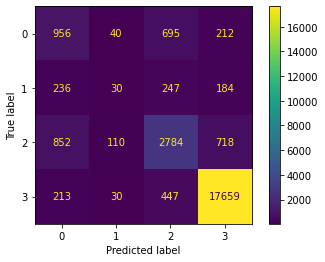

In [26]:
# Plot confusion matrix
plot_confusion_matrix(ll, X_test, Y_test)  # doctest: +SKIP
plt.show() 

### Gaussian Naive Bayes Classifier

In [28]:
# Gaussian Naive Bayes Classifier 
gaussianNB = GaussianNB()
gaussianNB.fit(XX, YY)
gnb_Y_predictions = gaussianNB.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, gnb_Y_predictions) * 100, "%")
# Getting the confusion matrix
print('Confusion Matrix:\n', confusion_matrix(Y_test, gnb_Y_predictions))
# Precision score
print('Precision Score: ', precision_score(Y_test, gnb_Y_predictions, average="micro"))
# Recall score
print('Recall Score: ', recall_score(Y_test, gnb_Y_predictions, average="micro"))
print(classification_report(Y_test, gnb_Y_predictions))

Accuracy:  26.632038720339985 %
Confusion Matrix:
 [[ 841  326  308  428]
 [ 275  184   87  151]
 [1618  556 1564  726]
 [7704 1282 5184 4179]]
Precision Score:  0.26632038720339984
Recall Score:  0.26632038720339984
              precision    recall  f1-score   support

           0       0.08      0.44      0.14      1903
           1       0.08      0.26      0.12       697
           2       0.22      0.35      0.27      4464
           3       0.76      0.23      0.35     18349

    accuracy                           0.27     25413
   macro avg       0.28      0.32      0.22     25413
weighted avg       0.60      0.27      0.31     25413



In [29]:
gnbF1 = metrics.f1_score(Y_test, gnb_Y_predictions, labels=labels, average=None)
weighted_f1_gnb = metrics.f1_score(Y_test, gnb_Y_predictions, labels=labels, average='weighted')
print("Weighted F1 Score: %.2f%%" % (weighted_f1_gnb * 100.0))
print('Agree F1 Score: %.2f%%' % (gnbF1[0]*100),'\n'
      'Disagree F1 Score: %.2f%%' % (gnbF1[1]*100),'\n'
      'Discuss F1 Score: %.2f%%' % (gnbF1[2]*100),'\n'
      'Unrelated F1 Score: %.2f%%' % (gnbF1[3]*100))

Weighted F1 Score: 31.41%
Agree F1 Score: 13.63% 
Disagree F1 Score: 12.09% 
Discuss F1 Score: 26.95% 
Unrelated F1 Score: 35.07%


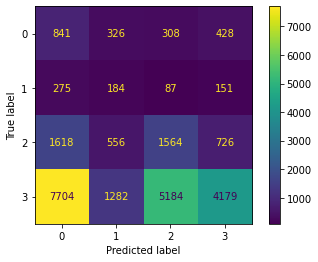

In [30]:
# Plot confusion matrix
plot_confusion_matrix(gaussianNB, X_test, Y_test)  # doctest: +SKIP
plt.show() 

### Bernoulli Naive Bayes Classifier 

In [31]:
# Bernoulli Naive Bayes Classifier 
bernoilliNB = BernoulliNB()
bernoilliNB.fit(XX, YY)
bnb_Y_predictions = bernoilliNB.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, gnb_Y_predictions) * 100, "%")
# Getting the confusion matrix
print('Confusion Matrix:\n', confusion_matrix(Y_test, bnb_Y_predictions))
# Precision score
print('Precision Score: ', precision_score(Y_test, bnb_Y_predictions, average="micro"))
# Recall score
print('Recall Score: ', recall_score(Y_test, bnb_Y_predictions, average="micro"))
print(classification_report(Y_test, bnb_Y_predictions))

Accuracy:  26.632038720339985 %
Confusion Matrix:
 [[  252    59   238  1354]
 [  126    62    67   442]
 [  326   121   800  3217]
 [ 1220   265  2239 14625]]
Precision Score:  0.6193286900405305
Recall Score:  0.6193286900405305
              precision    recall  f1-score   support

           0       0.13      0.13      0.13      1903
           1       0.12      0.09      0.10       697
           2       0.24      0.18      0.20      4464
           3       0.74      0.80      0.77     18349

    accuracy                           0.62     25413
   macro avg       0.31      0.30      0.30     25413
weighted avg       0.59      0.62      0.60     25413



In [57]:
bnbF1 = metrics.f1_score(Y_test, bnb_Y_predictions, labels=labels, average=None)
weighted_f1_bnb = metrics.f1_score(Y_test, bnb_Y_predictions, labels=labels, average='weighted')
print("Weighted F1 Score: %.2f%%" % (weighted_f1_bnb * 100.0))
print('Agree F1 Score: %.2f%%' % (bnbF1[0]*100),'\n'
      'Disagree F1 Score: %.2f%%' % (bnbF1[1]*100),'\n'
      'Discuss F1 Score: %.2f%%' % (bnbF1[2]*100),'\n'
      'Unrelated F1 Score: %.2f%%' % (bnbF1[3]*100))

Weighted F1 Score: 60.46%
Agree F1 Score: 13.17% 
Disagree F1 Score: 10.30% 
Discuss F1 Score: 20.49% 
Unrelated F1 Score: 77.00%


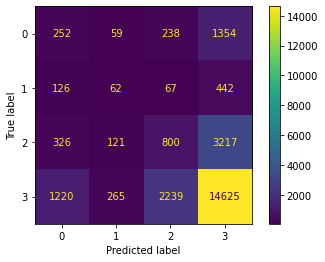

In [34]:
# Plot confusion matrix
plot_confusion_matrix(bernoilliNB, X_test, Y_test)  # doctest: +SKIP
plt.show() 

### Random Forest Classifier

In [37]:
# Random Forest Classifier 
randomForest = RandomForestClassifier(random_state=1)
randomForest.fit(XX, YY)
rf_Y_predictions = randomForest.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, rf_Y_predictions) * 100, "%")
# Getting the confusion matrix
print('Confusion Matrix:\n', confusion_matrix(Y_test, rf_Y_predictions))
# Precision score
print('Precision Score: ', precision_score(Y_test, rf_Y_predictions, average="micro"))
# Recall score
print('Recall Score: ', recall_score(Y_test, rf_Y_predictions, average="micro"))
print(classification_report(Y_test, rf_Y_predictions))

Accuracy:  77.07472553417543 %
Confusion Matrix:
 [[ 1050     0   759    94]
 [  302     0   310    85]
 [  714     0  3373   377]
 [  450     0  2735 15164]]
Precision Score:  0.7707472553417543
Recall Score:  0.7707472553417543
              precision    recall  f1-score   support

           0       0.42      0.55      0.48      1903
           1       0.00      0.00      0.00       697
           2       0.47      0.76      0.58      4464
           3       0.96      0.83      0.89     18349

    accuracy                           0.77     25413
   macro avg       0.46      0.53      0.49     25413
weighted avg       0.81      0.77      0.78     25413



/Users/neeraj/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
randomForestF1 = metrics.f1_score(Y_test, rf_Y_predictions, labels=labels, average=None)
weighted_f1_rf = metrics.f1_score(Y_test, rf_Y_predictions, labels=labels, average='weighted')
print("Weighted F1 Score: %.2f%%" % (weighted_f1_rf * 100.0))
print('Agree F1 Score: %.2f%%' % (randomForestF1[0]*100),'\n'
      'Disagree F1 Score: %.2f%%' % (randomForestF1[1]*100),'\n'
      'Discuss F1 Score: %.2f%%' % (randomForestF1[2]*100),'\n'
      'Unrelated F1 Score: %.2f%%' % (randomForestF1[3]*100))

Weighted F1 Score: 78.01%
Agree F1 Score: 47.52% 
Disagree F1 Score: 0.00% 
Discuss F1 Score: 57.95% 
Unrelated F1 Score: 89.02%


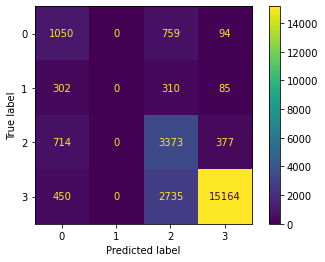

In [39]:
# Plot confusion matrix
plot_confusion_matrix(randomForest, X_test, Y_test)  # doctest: +SKIP
plt.show() 

### Decision Tree Classifier

In [43]:
# Decision Tree Classifier 
decisionTree = DecisionTreeClassifier(random_state=1)
decisionTree.fit(XX, YY)
dt_Y_predictions = decisionTree.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, dt_Y_predictions) * 100, "%")
# Getting the confusion matrix
print('Confusion Matrix:\n', confusion_matrix(Y_test, dt_Y_predictions))
# Precision score
print('Precision Score: ', precision_score(Y_test, dt_Y_predictions, average="micro"))
# Recall score
print('Recall Score: ', recall_score(Y_test, dt_Y_predictions, average="micro"))
print(classification_report(Y_test, dt_Y_predictions))

Accuracy:  76.95667571715263 %
Confusion Matrix:
 [[  775   246   737   145]
 [  256   102   220   119]
 [ 1362   274  2254   574]
 [  779   111  1033 16426]]
Precision Score:  0.7695667571715263
Recall Score:  0.7695667571715263
              precision    recall  f1-score   support

           0       0.24      0.41      0.31      1903
           1       0.14      0.15      0.14       697
           2       0.53      0.50      0.52      4464
           3       0.95      0.90      0.92     18349

    accuracy                           0.77     25413
   macro avg       0.47      0.49      0.47     25413
weighted avg       0.80      0.77      0.78     25413



In [56]:
dtF1 = metrics.f1_score(Y_test, dt_Y_predictions, labels=labels, average=None)
weighted_f1_dt = metrics.f1_score(Y_test, dt_Y_predictions, labels=labels, average='weighted')
print("Weighted F1 Score: %.2f%%" % (weighted_f1_dt * 100.0))
print('Agree F1 Score: %.2f%%' % (dtF1[0]*100),'\n'
      'Disagree F1 Score: %.2f%%' % (dtF1[1]*100),'\n'
      'Discuss F1 Score: %.2f%%' % (dtF1[2]*100),'\n'
      'Unrelated F1 Score: %.2f%%' % (dtF1[3]*100))

Weighted F1 Score: 78.38%
Agree F1 Score: 30.54% 
Disagree F1 Score: 14.27% 
Discuss F1 Score: 51.77% 
Unrelated F1 Score: 92.25%


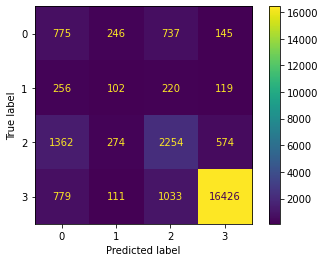

In [45]:
# Plot confusion matrix
plot_confusion_matrix(decisionTree, X_test, Y_test)  # doctest: +SKIP
plt.show() 

### MLP Classifier

In [48]:
# MLP Classifier(Neural Net)
mlpClassifier = MLPClassifier(random_state=1)
mlpClassifier.fit(XX, YY)
mlp_Y_predictions = mlpClassifier.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, mlp_Y_predictions) * 100, "%")
# Getting the confusion matrix
print('Confusion Matrix:\n', confusion_matrix(Y_test, mlp_Y_predictions))
# Precision score
print('Precision Score: ', precision_score(Y_test, mlp_Y_predictions, average="micro"))
# Recall score
print('Recall Score: ', recall_score(Y_test, mlp_Y_predictions, average="micro"))
print(classification_report(Y_test, mlp_Y_predictions))

Accuracy:  81.28123401408727 %
Confusion Matrix:
 [[  744    21   924   214]
 [  155     9   348   185]
 [  705    88  2966   705]
 [  405    71   936 16937]]
Precision Score:  0.8128123401408728
Recall Score:  0.8128123401408728
              precision    recall  f1-score   support

           0       0.37      0.39      0.38      1903
           1       0.05      0.01      0.02       697
           2       0.57      0.66      0.62      4464
           3       0.94      0.92      0.93     18349

    accuracy                           0.81     25413
   macro avg       0.48      0.50      0.49     25413
weighted avg       0.81      0.81      0.81     25413



In [55]:
mlpF1 = metrics.f1_score(Y_test, mlp_Y_predictions, labels=labels, average=None)
weighted_f1_mlp = metrics.f1_score(Y_test, mlp_Y_predictions, labels=labels, average='weighted')
print("Weighted F1 Score: %.2f%%" % (weighted_f1_mlp * 100.0))
print('Agree F1 Score: %.2f%%' % (mlpF1[0]*100),'\n'
      'Disagree F1 Score: %.2f%%' % (mlpF1[1]*100),'\n'
      'Discuss F1 Score: %.2f%%' % (mlpF1[2]*100),'\n'
      'Unrelated F1 Score: %.2f%%' % (mlpF1[3]*100))

Weighted F1 Score: 80.93%
Agree F1 Score: 38.04% 
Disagree F1 Score: 2.03% 
Discuss F1 Score: 61.55% 
Unrelated F1 Score: 93.09%


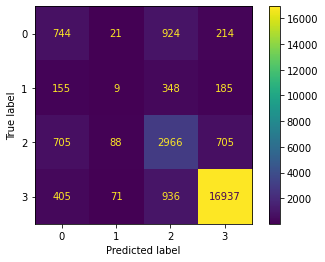

In [50]:
# Plot confusion matrix
plot_confusion_matrix(mlpClassifier, X_test, Y_test)  # doctest: +SKIP
plt.show() 

### Final Summary using SMOTE method

In [53]:
models_list = ['Random Forest', 'Logistic Regression', 'Gaussian NB', 'Bernoulli NB', 'Decision Tree', 'MLP']
rf_accuracy = accuracy_score(Y_test, rf_Y_predictions) * 100 
lr_accuracy = accuracy_score(Y_test, lr_Y_predictions) * 100
gnb_accuracy = accuracy_score(Y_test, gnb_Y_predictions) * 100
bnb_accuracy = accuracy_score(Y_test, bnb_Y_predictions) * 100
dt_accuracy = accuracy_score(Y_test, dt_Y_predictions) * 100
# lsvc_accuracy = accuracy_score(Y_test, lsvc_Y_predictions) * 100
mlp_accuracy = accuracy_score(Y_test, mlp_Y_predictions) * 100
models_accuracy = [rf_accuracy, lr_accuracy, gnb_accuracy, bnb_accuracy, dt_accuracy, mlp_accuracy]
summary = {'model': models_list, 'accuracy': models_accuracy}
models_summary = pd.DataFrame(summary)
models_summary.set_index('model', inplace=True)
models_summary.index.name = None

In [54]:
models_summary 

,accuracy
Random Forest,77.074726
Logistic Regression,84.322984
Gaussian NB,26.632039
Bernoulli NB,61.932869
Decision Tree,76.956676
MLP,81.281234
